<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/Sesi%C3%B3n%203/1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 3: Redes neuronales artificiales
## Tema: Redes neuronales convolucionales

El objetivo de esta libreta es crear una red convolucional para clasificar imágenes de MNIST.

Algunos datos de MNIST:
* MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba de dígitos manuscritos.
* Las imágenes se encuentran en escala de grises.
* Cada imagen tiene un tamaño de 28x28 píxeles.


In [ ]:
# Carga de bibliotecas
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

## Paso 1: Carga de datos

In [ ]:
#Descarga de la base de datos de imágenes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'Número de imágenes de entrenamiento: {len(X_train)}')
print(f'Número de imágenes de prueba: {len(X_test)}')

Número de imágenes de entrenamiento: 60000
Número de imágenes de prueba: 10000


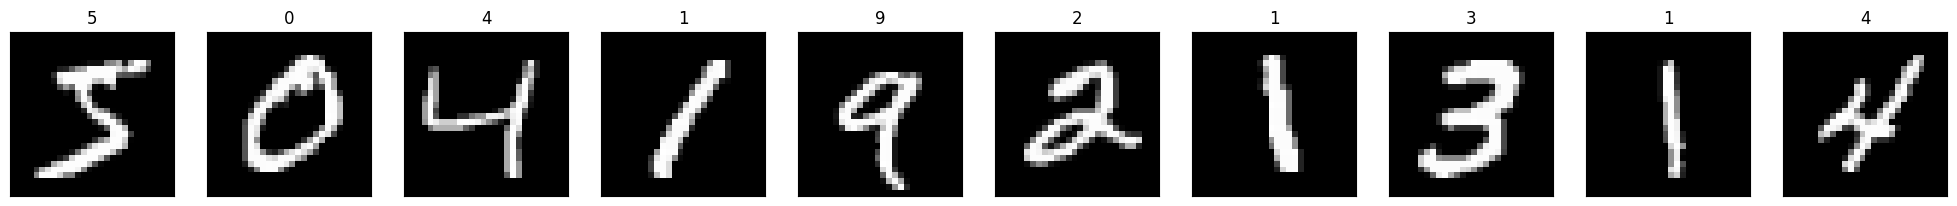

In [ ]:
#Visualizando algunas imágenes
muestras = 10
figure = plt.figure(figsize=(25, 25))
for indice in range(muestras):
    ax = figure.add_subplot(1, muestras, indice + 1, xticks=[], yticks=[])
    ax.imshow(X_train[indice], cmap='gray')
    ax.set_title(y_train[indice])


* ¿Qué número observas?
* ¿Son iguales todas las imágenes del mismo número?

## Hagamos un zoom a una imagen, ¿qué observas?


Esta imagen es una representación de lo que realmente "observa" una computadora.

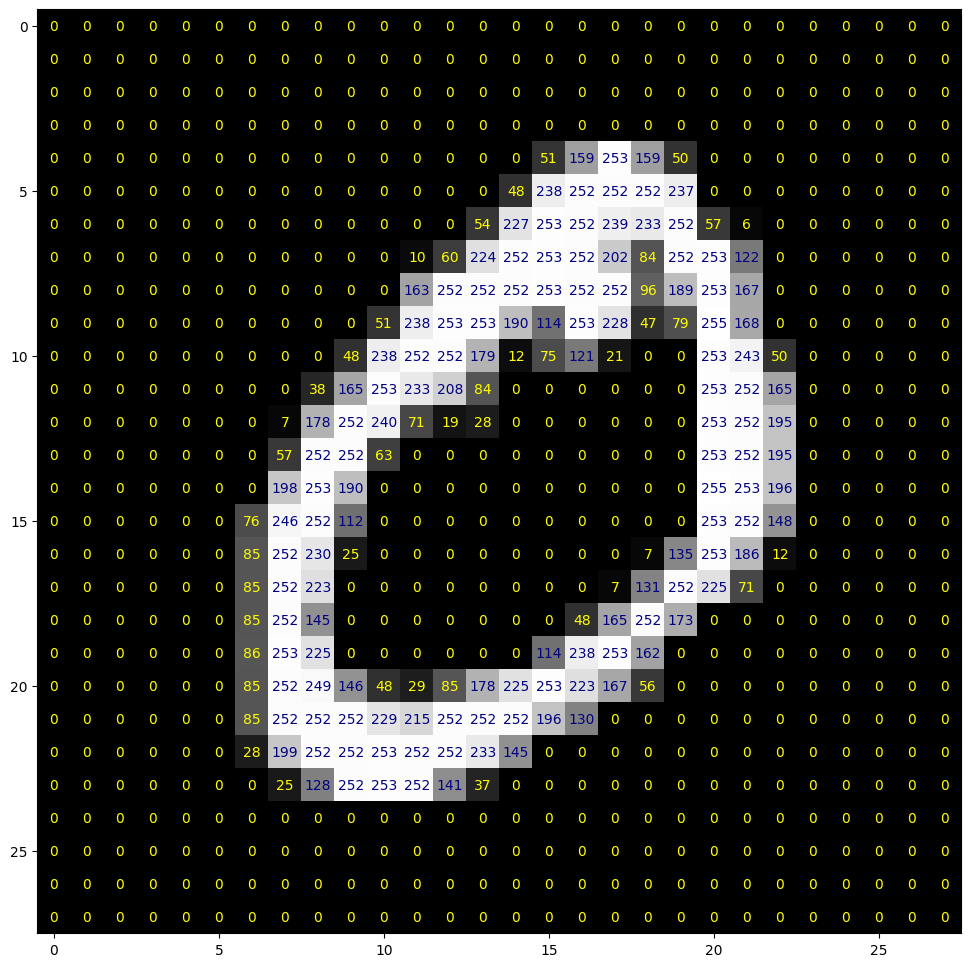

In [ ]:
def visualize_input(image, ax):
    ax.imshow(image, cmap='gray')
    width, height = image.shape
    threshold = image.max() / 2.5

    for x in range(width):
        for y in range(height):
            pixel_value = image[x][y]
            ax.annotate(f'{round(pixel_value, 2)}',
                        xy=(y, x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='yellow' if pixel_value < threshold else 'navy')

indice_muestra = 1
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(111)
visualize_input(X_train[indice_muestra], ax)

## Paso 2: Pre-procesamiento de las imágenes

In [ ]:
#Rescalar la imagen
#El valor de cada pixel se divide entre 255. Esto hará que cada pixel esté en un rango de 0 a 1.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#Codificar las etiquetas a vectores Ohe-Hot
#Las etiquetas reales tiene un valor de 1,2,...,9.
#Cada etiqueta se convertirá a un vector de solo ceros, a excepción del índice que representa al número, donde habrá un 1.

print('Observando algunas etiquetas originales \n:', y_train[:10])
total_etiquetas = 10
y_train = to_categorical(y_train, total_etiquetas) #conversión a Ohe-Hot
y_test = to_categorical(y_test, total_etiquetas)

print('Observando algunas etiquetas One-Hot:\n', y_train[:10])

Observando algunas etiquetas originales 
: [5 0 4 1 9 2 1 3 1 4]
Observando algunas etiquetas One-Hot:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Paso 3: Diseño de la arquitectura del modelo y entrenamiento

In [ ]:
# Model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",input_shape=(28, 28, 1)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
# Add dropouts to the model
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(total_etiquetas, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
EPOCHS = 10
BATCH_SIZE = 256
model_history = model.fit(X_train,
                          y_train,
                          batch_size=BATCH_SIZE,
                          validation_split=0.2, #creación del conjunto de validación
                          epochs=EPOCHS,
                          shuffle=True)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 173ms/step - accuracy: 0.8171 - loss: 0.5989 - val_accuracy: 0.9683 - val_loss: 0.1147
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.9572 - loss: 0.1391 - val_accuracy: 0.9783 - val_loss: 0.0751
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.9771 - loss: 0.0746 - val_accuracy: 0.9833 - val_loss: 0.0583
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.9815 - loss: 0.0559 - val_accuracy: 0.9832 - val_loss: 0.0560
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.9859 - loss: 0.0464 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.9876 - loss: 0.0400 - val_accuracy: 0.9853 - val_loss: 0.0511
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.9889 - loss: 0

## Evaluando el rendimiento del modelo

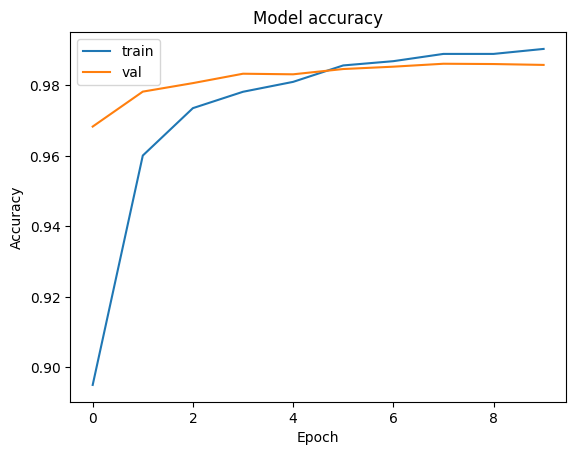

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

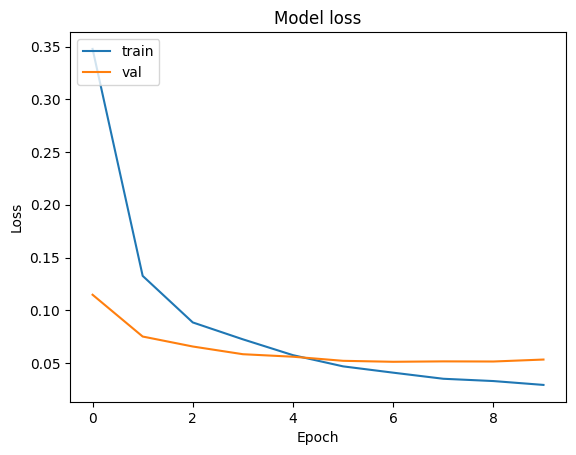

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Evaluando en el conjunto de prueba
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {100 * score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9808 - loss: 0.0630
Test accuracy: 98.51999878883362
